<a href="https://colab.research.google.com/github/Henil21/Classification-with-TensorFlow-/blob/main/Neural_network_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow ⛹
**A classification problem involves predicting whether something is one thing or another.**

* Binary classification
* multiclass classification
* multilabel classification

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
import numpy as np
# making 1000 example
n_sample=1000
# create circle
x,y =make_circles(n_sample, 
                  noise=0.03,
                  random_state=42)

In [2]:
# lets check lables
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

**our data is hard to understand lets visualize it.! 👀**

In [4]:
import pandas as pd 
circles=pd.DataFrame({"X0":x[:,0],"x1":x[:,1],"label":y})
circles

,X0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


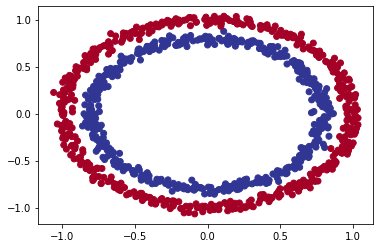

In [5]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

# Input & Output Shape 📄

In [6]:
# checking shape
x.shape , y.shape

((1000, 2), (1000,))

In [7]:
# viewing firste example of features and labels
x[120],y[120]

(array([ 0.18300488, -0.78821267]), 1)

# **Steps in modelling ⚡**
* Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

* In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* creating or importing a model
* compiling the model
* fitting the model
* evaluate the model
* tweak the model 
* evaluate .....

In [8]:
tf.random.set_seed(42)

# creating a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#  compiling the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_1.fit(x,y,epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


**its only 48% (0.4830) accurate lets evaluate it and improve it ⚙**

##  improving model ⌨
1. Creating a model - here you might want to add more layers, increase the 
number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

2. Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.

3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).


In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=0) # fit for 100 passes of the data

**To visualize our model's predictions we're going to create a** function `plot_decision_boundary()` which:

* Takes in a trained model, features (X) and labels (y).

* Creates a meshgrid of the different X values.

* Makes predictions across the meshgrid.

* Plots the predictions as well as a line between the different zones (where each unique class falls).

* If this sounds confusing, let's see it in code and then see the output.

🔑 Note: If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [10]:
import numpy as np

In [11]:
def plot_decision_boundary(model,x,y):
  """
  plots the decison boundary created by a model predicting on x
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  x_min,x_max  =x[:,0].min()-0.1,x[:,0].max()+0.1
  y_min,y_max =x[:,1].min()-0.1,x[:,1].max()+0.1

  # (linspace) return evenly space number between x_min,x_max 
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  x_in=np.c_[xx.ravel(),yy.ravel()]
# making prediction
  y_pred=model.predict(x_in)
  # check for multi class
  if len(y_pred[0])>1:
    print("multiclass")
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("binary")
    y_pred=np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


  # plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  # plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)

binary


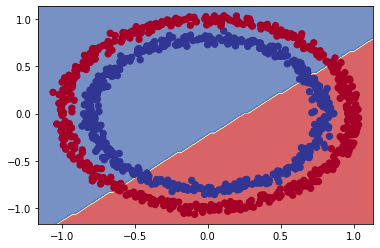

In [12]:
# checking out the prediction
plot_decision_boundary(model_3,x=x,y=y)

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
#             y_reg_train,
#             epochs=100)

In [14]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100,
            verbose=0)

Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

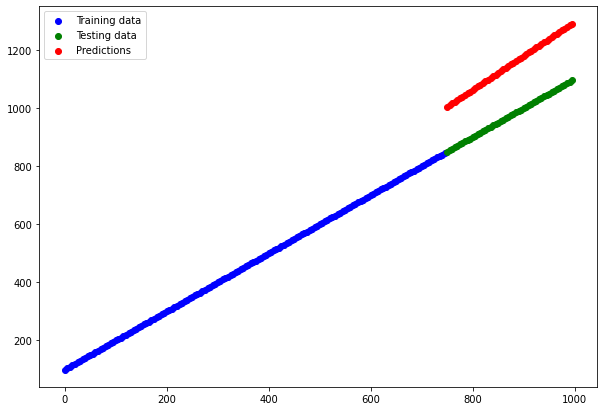

In [15]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

# **Missing piece:non-linearity 〰**

In [16]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear")
])
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])
history=model_4.fit(x,y,epochs=100,verbose=0)

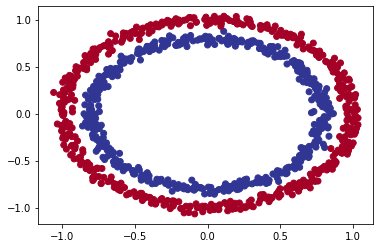

In [17]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);

binary


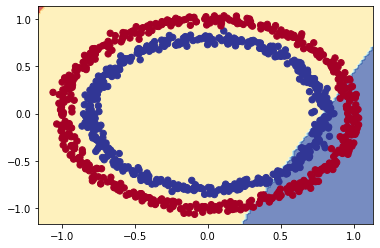

In [18]:
plot_decision_boundary(model_4,x=x,y=y)

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the activation parameter in on of our layers.

In [19]:
tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# model_5.fit(x,y,epochs=100)
history = model_5.fit(x, y, epochs=100,verbose=0)

What we if increased the number of neurons and layers ❓

In [20]:
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
 tf.keras.layers.Dense(4,activation='relu'),   
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(1)
])
 
model_6.compile(loss=tf.keras.losses.binary_focal_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_6.fit(x,y,epochs=100,verbose=0)

binary


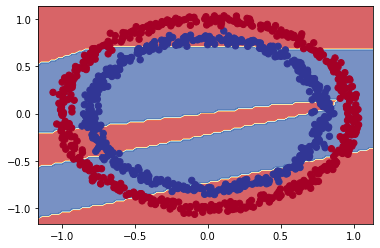

In [21]:
plot_decision_boundary(model_6,x,y)

In [22]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='elu'),
    tf.keras.layers.Dense(4,activation='elu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])
history=model_7.fit(x,y,epochs=25,verbose=1)

Epoch 1/25
32/32 [==============================] - 1s 1ms/step - loss: 0.6870 - accuracy: 0.5760
Epoch 2/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5670
Epoch 3/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5530
Epoch 4/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5930
Epoch 5/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.5660
Epoch 6/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5560
Epoch 7/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.5880
Epoch 8/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.5570
Epoch 9/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.5800
Epoch 10/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5650
Epoch 11/25
32/32 [

binary


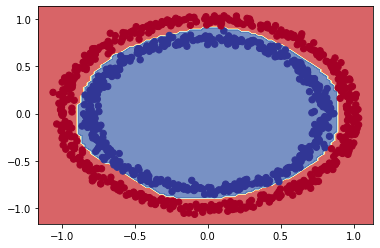

In [23]:
plot_decision_boundary(model_7,x,y)


 **Question**: What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

**🔑 Note**: The combination of **linear (straight lines) and non-linear (non-straight lines)** functions is one of the key fundamentals of neural networks.

**To get some intuition** about the activation functions we've just used, let's create them and then try them on some toy data.

In [24]:
# Create a toy tensor (similar to the data we pass into our model)
a=tf.cast(tf.range(-10,10),tf.float32)

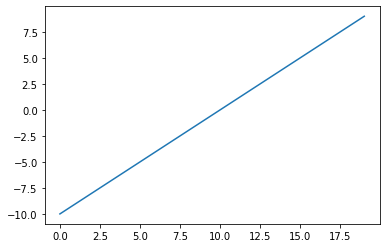

In [25]:
plt.plot(a)

**lets** try to replicate the sigmoid function ⚔

 [sigmoid(x)](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid)= 1 / (1 + exp(-x))

In [26]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

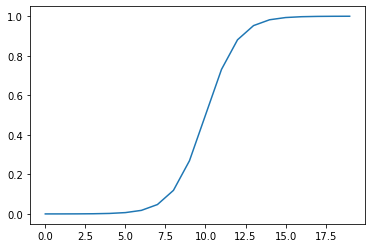

In [27]:
plt.plot(sigmoid(a))

In [28]:
# ReLu
def relu(x):
  return tf.maximum(0,x)
relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

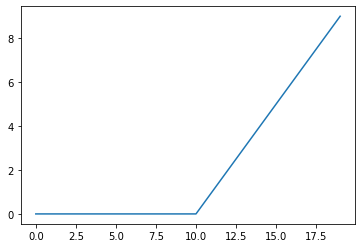

In [29]:
plt.plot(relu(a))

# **Evaluating and improving our classification model ⛲**
we were traning and testing on same data 

which is basically sin 💀 in machine_learning

Lets create traning and testing data

In [30]:
len(x)

1000

In [31]:
# spliting data
X_train,y_train=x[:800],y[:800]
X_test,y_test=x[800:],y[800:]

In [32]:
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 1.0000


[0.04642655327916145, 1.0]

binary
binary


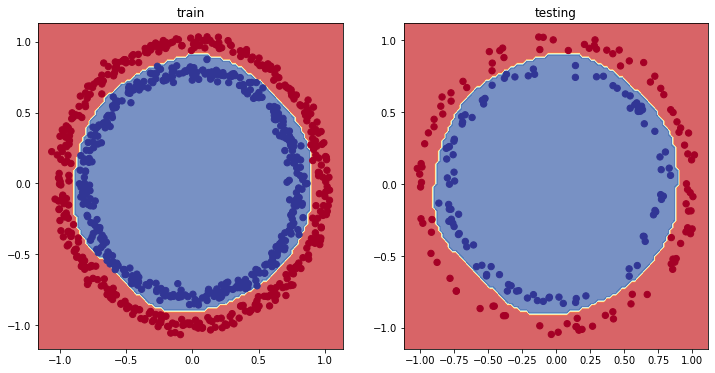

In [33]:
# plot the decision boundary for test and traning data set
plt.figure(figsize=(12,6))
# this subplot is for training data 
plt.subplot(1,2,1)
# 1 row 2 column 
plt.title("train")
plot_decision_boundary(model_7,x=X_train,y=y_train)
# this subplot is for Testing  data 
plt.subplot(1,2,2)
plt.title("testing")
plot_decision_boundary(model_7,x=X_test,y=y_test)

# Plot the loss (or training) curves

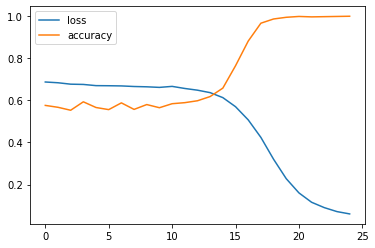

In [34]:
pd.DataFrame(history.history).plot()

🔑 Note: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels

## Finding the best learning rate 🔎
To find the ideal learning rate  we're going tp use the following steps:

* A learning rate **callback**-extra piece of funtionality we can add to our **while** its training.

* A modified loss curve plot.

In [35]:
tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_8.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# creating a learning rate call back
lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4*10**(epochs/20) )
# fitting with schedular
history_8=model_8.fit(X_train,y_train, epochs=100, callbacks=[lr_schedular],verbose=0)

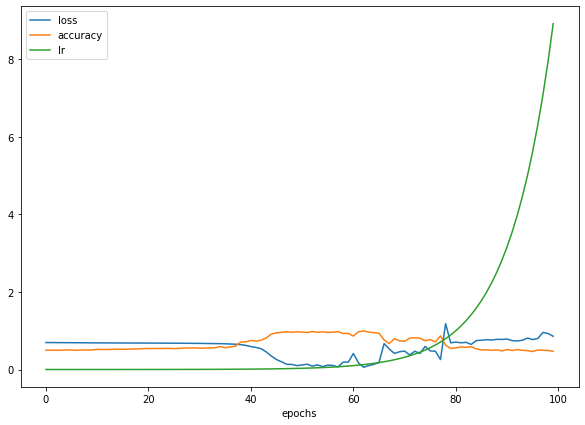

In [36]:
pd.DataFrame(history_8.history).plot(figsize=(10,7),xlabel="epochs")

Text(0, 0.5, 'loss')

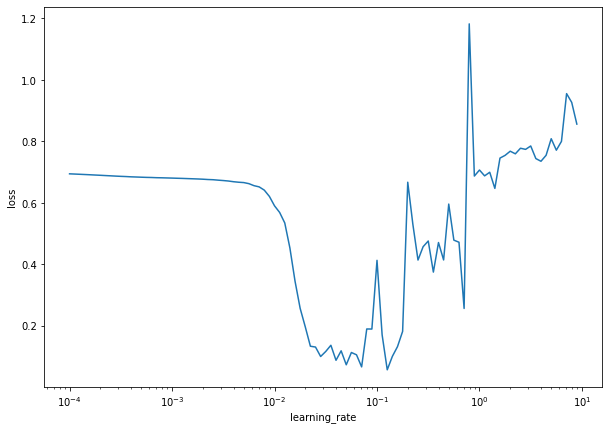

In [37]:
# Plot the learning rate VS the loss
lrs= 1e-4*(10**(tf.range(100)/20))
# len(lrs)
plt.figure(figsize=(10,7))

# making graph with log power in x axis(semilogx)
plt.semilogx(lrs,history_8.history["loss"])

plt.xlabel("learning_rate")
plt.ylabel("loss")

In [38]:
# lets try using higher *ideal* learning rate with same model
tf.random.set_seed(42)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])
history_9=model_9.fit(X_train,y_train,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

binary
binary


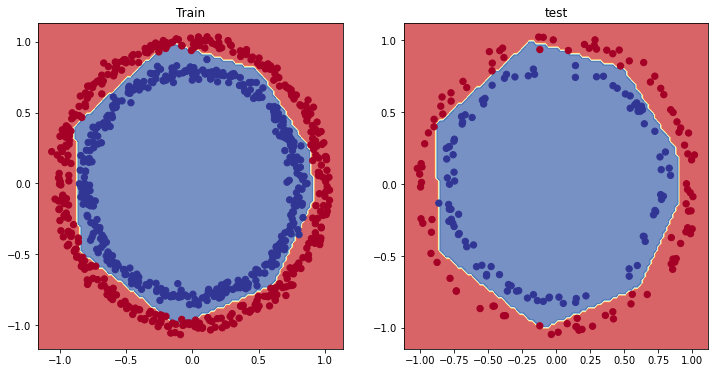

In [39]:
# pd.DataFrame(history_9.history).plot(figsize=(10,7))
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9,x=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_9,x=X_test,y=y_test)
plt.show()

## More classification evaluation methods


Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

* Accuracy
* precision
* recall
* F1-score
* confusion matrix
* classification report(from Scikit-learn)-https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [40]:
loss,accuracy=model_9.evaluate(X_test,y_test)
print(f"model loss on the test set:{loss}")
print(f"model accuracy on the test set:{(accuracy*100):2f}%")

# :2f round up upto 2 decimal values

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
model loss on the test set:0.05740184709429741
model accuracy on the test set:99.000001%


  lets create confusion matrix

In [41]:
from sklearn.metrics import confusion_matrix

# Making predictions
y_pred=model_9.predict(X_test)
# confusion_matrix(y_test,y_pred)

In [42]:
y_pred[:5]

array([[0.9852654 ],
       [0.9992379 ],
       [0.9903235 ],
       [0.9970694 ],
       [0.39622977]], dtype=float32)

In [43]:
y_test[:5]

array([1, 1, 1, 1, 0])

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (9.8526537e-01), they're in a form called **prediction probabilities.** The standard output  form the sigmod or softmax activation function 

In [48]:
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [47]:
confusion_matrix(y_test,tf.round(y_pred))

array([[99,  2],
       [ 0, 99]])

Alright, we can see the highest numbers are down the diagonal (from top left to bottom right) so this a good sign, but the rest of the matrix doesn't really tell us much.

How about we make a function to make our confusion matrix a little more visual?

In [49]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools
figsize=(10,10)

# creating confusion matrix
cm=confusion_matrix(y_test,tf.round(y_pred))
